In [1]:
#ピックルを呼び起こす
import pickle

# ファイルから保存された変数を読み込む
with open('pca_results.pkl', 'rb') as f:
    pca_components, explained_variance_ratio = pickle.load(f)

# 読み込んだ変数を利用する
# 例: 主成分分析の結果を表示する
print(pca_components)
print(explained_variance_ratio)

[[-5.52881495e-05 -2.01268207e-05 -3.34022159e-06 ...  1.27092739e-07
  -5.74282417e-07  1.52258508e-07]
 [ 2.09947573e-04  2.81011027e-04 -1.00832560e-05 ... -5.41132135e-07
  -2.19594370e-06 -1.43517604e-06]
 [-8.96853727e-04 -3.69240800e-04 -2.09142677e-05 ...  2.10233793e-06
  -2.55864480e-06 -9.41886884e-06]]
[0.01881811 0.00668132 0.00461701]


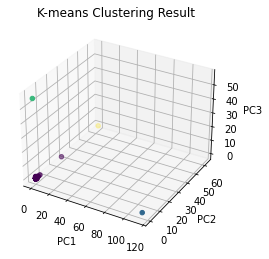

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reduced_cross_tab_df =pd.read_csv("PC_result.csv")

# 3次元散布図を作成
fig = plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)

# クラスタリング結果を可視化
#右は間違いax.scatter(reduced_cross_tab_df['PC1'], reduced_cross_tab_df['PC2'], reduced_cross_tab_df['PC3'],reduced_cross_tab_df['Cluster'])

ax.scatter(reduced_cross_tab_df['PC1'], reduced_cross_tab_df['PC2'], reduced_cross_tab_df['PC3'], c=reduced_cross_tab_df['Cluster'].values)


# 軸ラベルの設定
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# グラフのタイトル設定
ax.set_title('K-means Clustering Result')

# グラフの表示
plt.show()

# 画像データとして保存
fig.savefig('図の保存先のファイルパス.png')

In [3]:
fig = plt.figure()
fig.savefig("img.png")

<Figure size 432x288 with 0 Axes>

In [4]:
reduced_cross_tab_df.head(10)

,customer_id,PC1,PC2,PC3,Cluster
0,0005d926defbe130e228dd8892aa879d89858e6ffc9a60...,-0.007210,-0.010410,-0.000880,0
1,000b1dcb46a5af8acaddb09d5d07df16e182291f3b0ced...,-0.007162,-0.010867,0.000126,0
2,000d3ae6f3d047f12c5caa2c0125f7f6bb0475c0bdc3e2...,-0.007276,-0.011549,-0.002778,0
3,000e197737527f80348deefdee5d68ed6af86ec41c2daf...,-0.007259,-0.010884,-0.009079,0
4,000fa62c9e64d11bc25c530736949fd8dfc9a39d50c453...,-0.007285,-0.010317,-0.013132,0
5,001462e7f093ad14d214cb1cec0fa8478b36f32fbfde60...,-0.007184,-0.010538,-0.000058,0
6,001515a489adba3bc8715cbbb8b9bd51ccb178e8857004...,-0.007172,-0.010765,-0.000085,0
7,001b2ab36161e4bda632bdb4598eaefc46f3d22ff07ea3...,-0.007304,-0.010780,-0.002718,0
8,001d5cd98fcdbc6bde738b8ad6041b67ca1e3e8be5c4c0...,-0.007539,-0.008127,-0.004101,0
9,0024702ec89e417c972f52b6cd1ee3a102c6f7f1ce5ff4...,-0.007142,-0.010798,0.000335,0


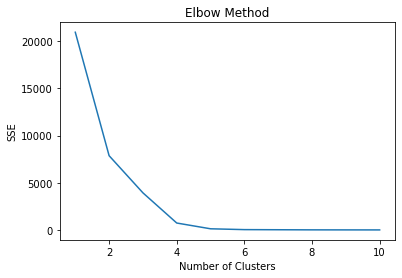

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the non-numeric column from the DataFrame
numeric_df = reduced_cross_tab_df.drop('customer_id', axis=1)

# SSE's list to hold values
sse = []

# Range of cluster numbers
k_range = range(1, 11)

# Execute K-means clustering for each cluster number and calculate SSE
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df)
    sse.append(kmeans.inertia_)

# Plot the SSE values
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [6]:
#ここからは、作成したPCAを、CSVにし、snowflakeに取り込んできます。
print(reduced_cross_tab_df)

                                             customer_id       PC1       PC2  \
0      0005d926defbe130e228dd8892aa879d89858e6ffc9a60... -0.007210 -0.010410   
1      000b1dcb46a5af8acaddb09d5d07df16e182291f3b0ced... -0.007162 -0.010867   
2      000d3ae6f3d047f12c5caa2c0125f7f6bb0475c0bdc3e2... -0.007276 -0.011549   
3      000e197737527f80348deefdee5d68ed6af86ec41c2daf... -0.007259 -0.010884   
4      000fa62c9e64d11bc25c530736949fd8dfc9a39d50c453... -0.007285 -0.010317   
...                                                  ...       ...       ...   
19863  c3a55be8adbb11a23368d939d19529fa1ab1c958b76b7c... -0.007148 -0.010829   
19864  c3a9a3ac88764ee4bdc0f84736b817c26df2632cc51c54... -0.007237 -0.009381   
19865  c3ad62399d6596155304824458396d79e78a8008e2f810... -0.007105 -0.010888   
19866  c3ae209936ae7d25cdbdf135700899f8aef66b63b55cad... -0.007147 -0.010827   
19867  c3b60209ba3ba53f898aa8861e41c6cbc5215cfea3d574... -0.007417 -0.010553   

            PC3  Cluster  
0     -0.000